# ISD - TP 3 - Analyse des données socio-économiques

## Groupe: Anatole Roy - Timothée Van Hove


### Exercice 1

Commencez par importer le module gapminder avec pip. Une fois installé ce module, vous aurez accès à un dataframe appelé gapminder. Utilisez les méthodes head(), describe() et info() pour vous familiariser.

In [3]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from gapminder import gapminder as gm

In [4]:
gm.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [5]:
gm.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


In [6]:
gm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


### Exercice 2

Utilisez la commande pandas.DataFrame.hist(gapminder) pour vous faire une idée plus précise des valeurs dans la base de données.

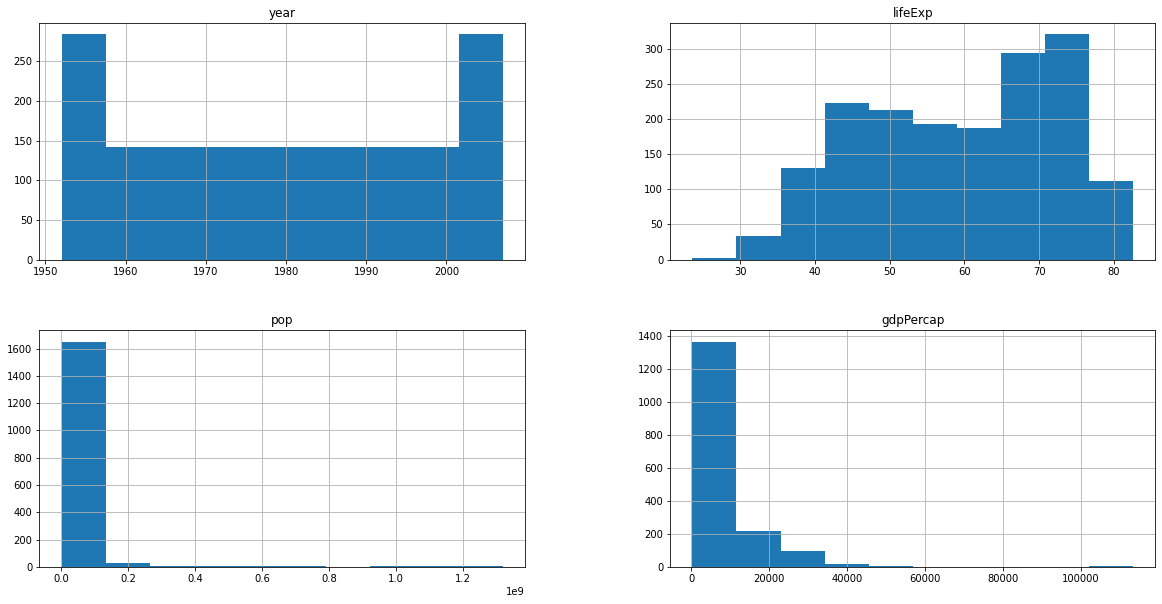

In [7]:
gm.hist(figsize=(20, 10));

### Question 1: Que pouvez-vous conclure à partir de ces histogrammes ?
Réponse:

**Année:** A priori il doit manquer des valeurs d'années pour certains pays.

**Espérance de vie:** On peut voir qu'elle est très variée selon les pays, mais qu'elle tend vers 75 ans en général.

**Population:** On peut voir que la majorité des pays ont une petite population.

**PIB/hab.:** Malheureusement, nous constatons que la vaste majorité des pays ont un PIB bas, alors qu'un minuscule pourcentage a un haut PIB.

### Exercice 3

Trouvez combien d’observations il y a par pays (c.a.d., combien de données par année par pays) et vérifiez s’il y a des données manquantes.

In [8]:
#Nombre de données par pays pour toutes les année (12 données / pays) => probablement 12 années sont représentées
gm.groupby('country').count().describe()

,continent,year,lifeExp,pop,gdpPercap
count,142.0,142.0,142.0,142.0,142.0
mean,12.0,12.0,12.0,12.0,12.0
std,0.0,0.0,0.0,0.0,0.0
min,12.0,12.0,12.0,12.0,12.0
25%,12.0,12.0,12.0,12.0,12.0
50%,12.0,12.0,12.0,12.0,12.0
75%,12.0,12.0,12.0,12.0,12.0
max,12.0,12.0,12.0,12.0,12.0


In [9]:
#Nombre de données par pays par année (1 donnée / année / pays) min-max sont égaux,
#donc il n'y a pas l'air d'avoir des données manquantes
gm.groupby(['country', 'year']).count().describe()

,continent,lifeExp,pop,gdpPercap
count,1704.0,1704.0,1704.0,1704.0
mean,1.0,1.0,1.0,1.0
std,0.0,0.0,0.0,0.0
min,1.0,1.0,1.0,1.0
25%,1.0,1.0,1.0,1.0
50%,1.0,1.0,1.0,1.0
75%,1.0,1.0,1.0,1.0
max,1.0,1.0,1.0,1.0


In [10]:
#On peut voir qu'il ne manque pas à proprement parler des données, simplement,
#elles sont récoltées tout les 5 ans pour chaque pays
gm.groupby('year').count()

,country,continent,lifeExp,pop,gdpPercap
year,,,,,
1952,142,142,142,142,142
1957,142,142,142,142,142
1962,142,142,142,142,142
1967,142,142,142,142,142
1972,142,142,142,142,142
1977,142,142,142,142,142
1982,142,142,142,142,142
1987,142,142,142,142,142
1992,142,142,142,142,142


### Exercice 4

Listez les valeurs uniques présentes dans les colonnes ‘continent’, ‘country’, et ‘year’. p.ex. utilisez la méthode unique().

In [12]:
print(f"Continents: {gm['continent'].unique()}\n")
print(f"Pays: {gm['country'].unique()}\n")
print(f"Années: {gm['year'].unique()}")

Continents: ['Asia' 'Europe' 'Africa' 'Americas' 'Oceania']

Pays: ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Australia'
 'Austria' 'Bahrain' 'Bangladesh' 'Belgium' 'Benin' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Czech Republic' 'Denmark' 'Djibouti' 'Dominican Republic' 'Ecuador'
 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Ethiopia' 'Finland'
 'France' 'Gabon' 'Gambia' 'Germany' 'Ghana' 'Greece' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Haiti' 'Honduras' 'Hong Kong, China' 'Hungary' 'Iceland'
 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica'
 'Japan' 'Jordan' 'Kenya' 'Korea, Dem. Rep.' 'Korea, Rep.' 'Kuwait'
 'Lebanon' 'Lesotho' 'Liberia' 'Libya' 'Madagascar' 'Malawi' 'Malaysia'
 'Mali' 'Mauritania' 'Mauritius

### Exercice 5

Calculez la moyenne de l’espérance de vie de tous les pays en 1952 et en 2007. Générez un bar chart permettant la comparaison de ces moyennes.

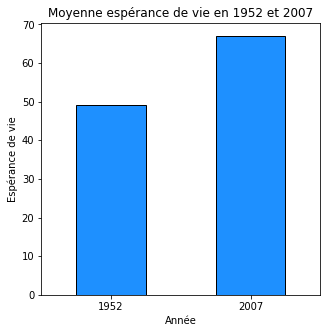

In [169]:
data = gm.loc[:, ["year", "lifeExp"]].query("year == 1952 | year == 2007").groupby("year")
data = data.mean("lifeExp")

plot = data.plot.bar(rot=0, color="dodgerblue", edgecolor="black", figsize=(5,5))
plot.set_xlabel("Année")
plot.set_ylabel("Espérance de vie");
plot.set_title("Moyenne espérance de vie en 1952 et 2007")
plot.get_legend().remove()

### Exercice 6

Calculez la moyenne de l’espérance de vie des pays par continent en 1952 et en 2007. Générez un bar chart permettant la comparaison de ces moyennes.

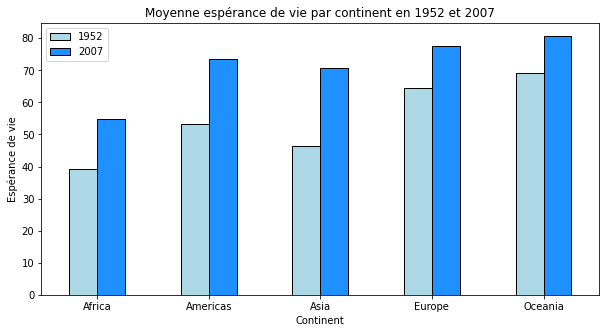

In [161]:
data = gm.loc[:, ["year", "continent", "lifeExp"]].query("year == 1952 | year == 2007").groupby(["year", "continent"])
data = data.mean("lifeExp")

#C'est la seule manière que j'ai trouvé pour que le graphe ne contienne pas l'année, probablement pas optimal...
data = data.unstack("year", fill_value=" ")

plot = data.plot.bar(rot=0, color={"lightblue","dodgerblue"}, edgecolor="black", figsize=(10,5))
plot.set_xlabel("Continent")
plot.set_ylabel("Espérance de vie")
plot.set_title("Moyenne espérance de vie par continent en 1952 et 2007")
plot.legend(labels=['1952', '2007'])

### Question 1: Quel continent a eu la plus grande progression ?

Réponse: L'asie a eu la plus grande progression en espérance de vie



### Exercice 7 

Générez un plot montrant l’évolution de 1952 à 2007 de la moyenne de la population par continent.

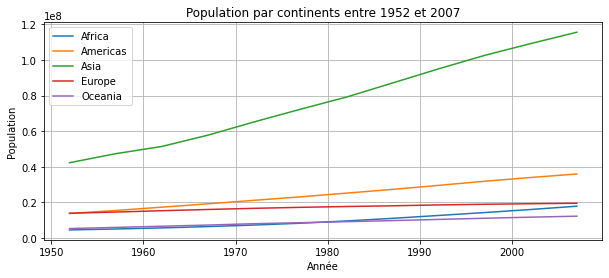

In [26]:
data = gm.loc[:, ["pop", "year", "continent"]].groupby(["year", "continent"])
data = data.mean("pop")
data = data.unstack("continent")
   
plot = data.plot(rot=0, figsize=(10,4))
plot.grid(which="both")
plot.set_xlabel("Année")
plot.set_ylabel("Population")
plot.set_title("Population par continents entre 1952 et 2007")
plot.legend(sorted(gm["continent"].unique()))

### Question 3: Que pouvez-vous conclure à partir de ces plots ?

Réponse: Nous constatons que l'évolution de la population en asie est extrêmement élevée par rapport aux autres continents

### Exercice 8

Générez deux sub-plots contenant un scatter plot avec l’espérance de vie des pays sur l’axe y et le PIB per capita sur l’axe x, pour l’année 1952 et séparément pour l’année 2007. Indiquez le continent par une couleur.

Q4. Que pouvez-vous conclure à partir de ces scatter plots ?

Text(0.5, 0.98, 'Scatter plot with life expectancy by dgpPercap by country for 1951 and 2007')

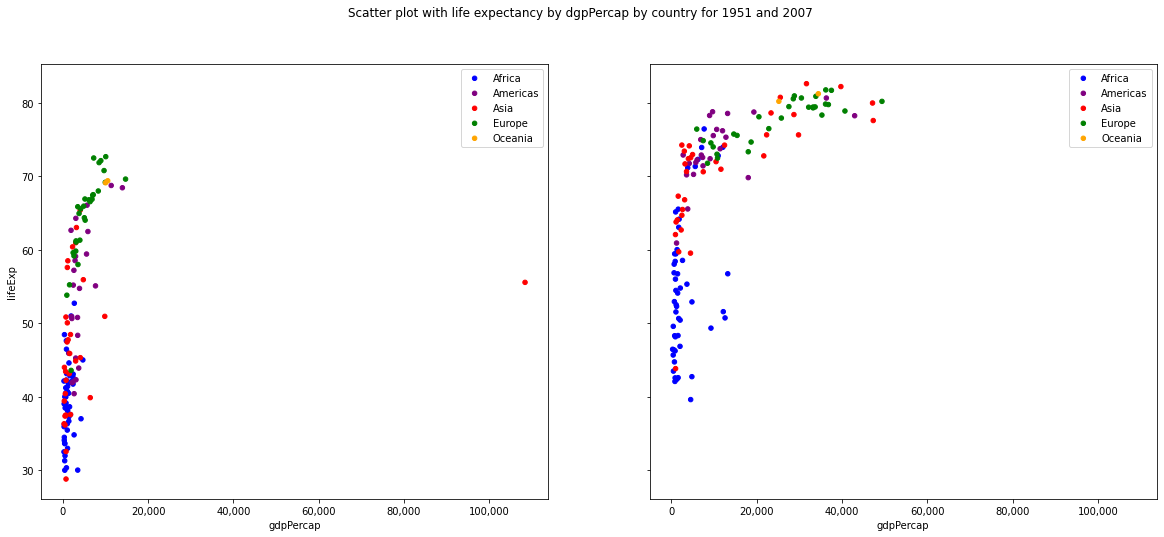

In [62]:
#data1 = gm.loc[:, ["year","gdpPercap","lifeExp", "continent"]].query("year == 1952")
#data2 = gm.loc[:, ["year","gdpPercap","lifeExp", "continent"]].query("year == 2007")
#colors = {'Americas':'red', 'Europe':'green', 'Asia':'blue', 'Oceania':'purple', 'Africa':'orange'}
#labels = {'Americas', 'Europe', 'Asia', 'Oceania', 'Africa'}
#plot1 = data1.plot.scatter(x="gdpPercap", y="lifeExp", c=data1['continent'].map(colors), figsize=(20,10))
#plot1.get_xaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ",")))
#plot2 = data2.plot.scatter(x="gdpPercap", y="lifeExp", c=data1['continent'].map(colors), figsize=(20,10))
#plot2.get_xaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ",")))
fig, axs = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(20, 8))
axs[0].get_xaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ",")))
colors = {'Asia':'red', 'Europe':'green', 'Africa':'blue', 'Americas':'purple', 'Oceania':'orange'}

data_1952 = gm.loc[:, ['continent','lifeExp', 'gdpPercap','year']].query("year == 1952")
data_2007 = gm.loc[:, ['continent','lifeExp', 'gdpPercap','year']].query("year == 2007")

for c, (continent, df_continent) in enumerate(data_1952.groupby('continent')):
    df_continent.plot.scatter(ax=axs[0], x="gdpPercap", y="lifeExp", c=df_continent['continent'].map(colors), label=continent)
    

for c, (continent, df_continent) in enumerate(data_2007.groupby('continent')):
    df_continent.plot.scatter(ax=axs[1], x="gdpPercap", y="lifeExp", c=df_continent['continent'].map(colors), label=continent)
fig.suptitle('Scatter plot with life expectancy by dgpPercap by country for 1951 and 2007')

### Question 4: Que pouvez-vous conclure à partir de ces scatter plots ?

Réponse:
entre 1952 et 2007, on peut déjà voir que le PIB des pays d'europe et d'asie on fortement augmenté et que l'espérance de vie a augmenté de manière générale.
De manière générale, nous pouvons estimer que les pays qui ont une espérance de vie plus longue, on aussi un PIB plus élevé, avec un démarquage plus fort en 2007


### Exercice 9

La fonction scatter de matplotlib permet non seulement d’indiquer une couleur mais aussi la taille de chaque « point ». Générez des scatter plots de l’espérance de vie vs. PIB par habitant (années 1952 et 2007) et visualisez la population
associée à chaque pays à l’aide d’un cercle de taille proportionnel à la population. Indiquez le continent par une couleur.

Text(0.5, 0.98, 'Scatter plot with life expectancy by dgpPercap by country for 1951 and 2007')

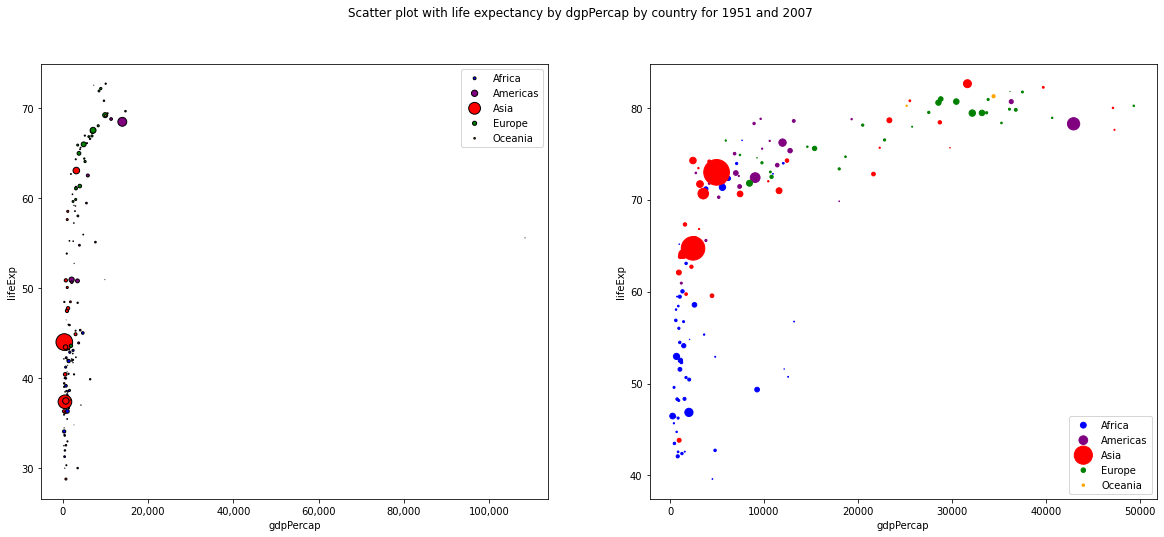

In [90]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
#axs[0].set_xbound(lower=0, upper=60000)

axs[0].get_xaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ",")))
colors = {'Asia':'red', 'Europe':'green', 'Africa':'blue', 'Americas':'purple', 'Oceania':'orange'}

data_1952 = gm.loc[:, ['continent','lifeExp', 'gdpPercap','year', "pop"]].query("year == 1952")
data_2007 = gm.loc[:, ['continent','lifeExp', 'gdpPercap','year', "pop"]].query("year == 2007")

for c, (continent, df_continent) in enumerate(data_1952.groupby('continent')):
    df_continent.plot.scatter(ax=axs[0], x="gdpPercap", y="lifeExp", s=df_continent['pop'] * 0.0000005,
                              facecolors='none',edgecolors='black', c=df_continent['continent'].map(colors),
                              label=continent)
    

for c, (continent, df_continent) in enumerate(data_2007.groupby('continent')):
    df_continent.plot.scatter(ax=axs[1], x="gdpPercap", y="lifeExp", s=df_continent['pop'] * 0.0000005, c=df_continent['continent'].map(colors), label=continent)
fig.suptitle('Scatter plot with life expectancy by dgpPercap by country for 1951 and 2007')

#plt.scatter(x, y, s=taille, facecolors='none', edgecolors='r')

### Exercice 10

Générez un scatter plot montrant l’augmentation de la population entre 1952 et 2007 (axe y) par rapport au PIB per capita. Indiquez le continent par une couleur.

Text(0.5, 0.98, 'Scatter plot with life expectancy by dgpPercap by country for 1951 and 2007')

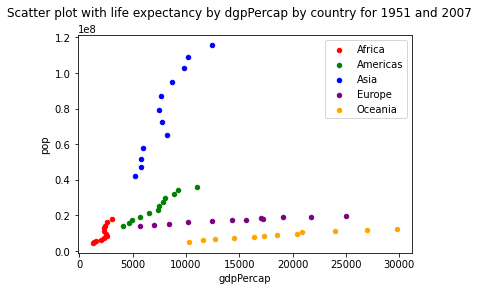

In [111]:
fig, ax = plt.subplots(1, 1)
colors = ['red', 'green', 'blue', 'purple','orange']

data = gm.loc[:, ['continent','pop', 'gdpPercap','year']]
for c, (continent, df_continent) in enumerate(data.groupby('continent')):
    df_continent.groupby('year').mean().plot.scatter(ax=ax, x="gdpPercap", y="pop", c=colors[c], label=continent)
   
    
fig.suptitle('Scatter plot with life expectancy by dgpPercap by country for 1951 and 2007')



### Question 5 Que pouvez-vous observer dans cette figure et que pouvez-vous conclure ?